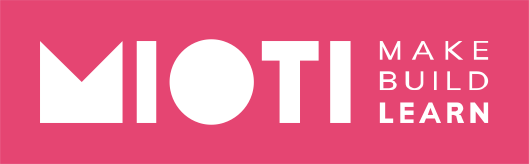
<center style="color:#888">Estadística para Data Science<br/>Asignatura Estadística<br/>Sesión 3: Estadística Descriptiva (I)</center>

# Procesamiento de datos

## Trabajo en Equipo. Ejercicio 1

Nombre del Equipo:

>> Personas:
* Nombre, Apellido1 Apellido2



## Datos

> El fichero *collectionsEE2013.csv*, contiene:
* Información sobre el número de palabras de unos textos en distintos idiomas.
* Cada fila representa un texto distinto y cada columna un idioma.

## Ejercicio

> Para cada idioma, calcular el número medio, máximo y mínimo, así como 
la mediana de palabras de los textos en ese idioma 

> Para cada texto, calcular el número medio, máximo y mínimo, así como la mediana
 de palabras de cada texto para los distintos idiomas
 
> Con los valores calculados anteriormente, obtener 8 tablas que muestren 
para cada texto en cada idioma, la diferencia entre las palabras de ese texto en ese idioma con cada uno de los valores calculados anteriormente. 
>> Es decir, una tabla con las diferencias entre los máximos por idioma, otra tabla con la diferencias entre los máximos por texto a lo largo de los idiomas, etc…
De las ocho tablas anteriores:
* Guardar las cuatro relativas a diferencias con las palabras de texto por cada idioma en un fichero excel llamado diferenciasPorIdioma.xlsx. Nombrar cada hoja adecuadamente.
* Guardar las otras cuatro tabla en un fichero llamado diferenciasPorTexto.xlsx. Nombrar cada hoja adecuadamente

# Solución

In [15]:
import pandas as pd
import numpy as np
fichero = "collectionsEE2013.csv"
datosIdiomas = pd.read_csv(fichero)
pd.DataFrame(datosIdiomas)
datosIdiomas.set_index('idDoc', inplace=True)
print (datosIdiomas)


       English  French  Italian  Russian  Spanish
idDoc                                            
1          635     609      612      556      603
2          687     700      626      586      601
3          551     536      508      432      514
4          596     575      548      530      580
5          735     699      649      608      671
6          631     680      621      558      657
7          726     759      703      652      711
8          703     696      645      629      658
9          776     816      759      688      779


In [23]:
#calculo las medias por columnas es decir por idiomas 
mediaCols=datosIdiomas.mean(axis=0)
print (mediaCols)
print()

#calculo los maximos por columnas es decir por idiomas 
maxCols=datosIdiomas.max(axis=0)
print (maxCols)

#calculo los minimos por columnas es decir por idiomas 
minCols=datosIdiomas.min(axis=0)
print (minCols)
print()

#calculo los medias por columnas es decir por idiomas 
medianaCols =datosIdiomas.median(axis=0)
print (medianaCols)
print()


English    671.111111
French     674.444444
Italian    630.111111
Russian    582.111111
Spanish    641.555556
dtype: float64

maximos por columnas es decir por idiomas 
English    776
French     816
Italian    759
Russian    688
Spanish    779
dtype: int64
English    551
French     536
Italian    508
Russian    432
Spanish    514
dtype: int64

English    687.0
French     696.0
Italian    626.0
Russian    586.0
Spanish    657.0
dtype: float64



In [13]:
#resto al dataframe las medias de las columnas para quedarme con las diferencias
#para la medias , maximos , minimos y medianas
dfmediaCols= datosIdiomas.iloc[:,:]-mediaCols
print ("dif media columnas")
print (dfmediaCols)
dfmaxCols= datosIdiomas.iloc[:,:]-maxCols
print ("dif maxima columnas")
print (dfmaxCols)
dfminCols= datosIdiomas.iloc[:,:]-minCols
print (dfminCols)
dfmedianaCols= datosIdiomas.iloc[:,:]-medianaCols
print (dfmedianaCols)


dif media columnas
          English      French     Italian     Russian     Spanish
idDoc                                                            
1      -36.111111  -65.444444  -18.111111  -26.111111  -38.555556
2       15.888889   25.555556   -4.111111    3.888889  -40.555556
3     -120.111111 -138.444444 -122.111111 -150.111111 -127.555556
4      -75.111111  -99.444444  -82.111111  -52.111111  -61.555556
5       63.888889   24.555556   18.888889   25.888889   29.444444
6      -40.111111    5.555556   -9.111111  -24.111111   15.444444
7       54.888889   84.555556   72.888889   69.888889   69.444444
8       31.888889   21.555556   14.888889   46.888889   16.444444
9      104.888889  141.555556  128.888889  105.888889  137.444444
dif maxima columnas
       English  French  Italian  Russian  Spanish
idDoc                                            
1         -141    -207     -147     -132     -176
2          -89    -116     -133     -102     -178
3         -225    -280     -251    

In [21]:
#Creamos dataframe nuevos uno para cada calculo 
dfmedia=pd.DataFrame()
dfmediana=pd.DataFrame()
dfmaximo=pd.DataFrame()
dfminimo=pd.DataFrame()

#Recorremos el dataframe por filas , calculo la media por por texto
# y se resta elemento a elemento de la fila 
for etiqueta,fila in datosIdiomas.iterrows():
    
    media=fila-fila.mean()
    dfmedia = dfmedia.append(media)
    print (fila.mean())
    maximo=fila-fila.max()
    dfmaximo = dfmaximo.append(maximo)
    minimo=fila-fila.min()
    dfminimo = dfminimo.append(minimo)
    mediana=fila-fila.median()
    dfmediana = dfmediana.append(mediana)
    
print() 
print (dfmedia)
print() 
print (dfmaximo)
print()
print (dfminimo)
print()
print (dfmediana)
print() 

603.0
640.0
508.2
565.8
672.4
629.4
710.2
666.2
763.6

   English  French  Italian  Russian  Spanish
1     32.0     6.0      9.0    -47.0      0.0
2     47.0    60.0    -14.0    -54.0    -39.0
3     42.8    27.8     -0.2    -76.2      5.8
4     30.2     9.2    -17.8    -35.8     14.2
5     62.6    26.6    -23.4    -64.4     -1.4
6      1.6    50.6     -8.4    -71.4     27.6
7     15.8    48.8     -7.2    -58.2      0.8
8     36.8    29.8    -21.2    -37.2     -8.2
9     12.4    52.4     -4.6    -75.6     15.4

   English  French  Italian  Russian  Spanish
1      0.0   -26.0    -23.0    -79.0    -32.0
2    -13.0     0.0    -74.0   -114.0    -99.0
3      0.0   -15.0    -43.0   -119.0    -37.0
4      0.0   -21.0    -48.0    -66.0    -16.0
5      0.0   -36.0    -86.0   -127.0    -64.0
6    -49.0     0.0    -59.0   -122.0    -23.0
7    -33.0     0.0    -56.0   -107.0    -48.0
8      0.0    -7.0    -58.0    -74.0    -45.0
9    -40.0     0.0    -57.0   -128.0    -37.0

   English  French  Ita

In [ ]:
#Creamos un excel con cuatro hojas por dada uno de los dataframe con las diferencia por 
# Idioma
writeridioma = pd.ExcelWriter('diferenciasPorIdioma.xlsx')
dfmediaCols.to_excel(writeridioma,"mediacol")
dfmedianaCols.to_excel(writeridioma,"medianacol")
dfminCols.to_excel(writeridioma,"maxcol")
dfmaxCols.to_excel(writeridioma,"mincol")

writeridioma.save()
#creo un excel con cuatro hojas por dada uno de los dataframe con las diferencia por texto
writertexto = pd.ExcelWriter('diferenciasPorTexto.xlsx')

dfmedia.to_excel(writertexto,"mediafila")
dfmediana.to_excel(writertexto,"medianafila")
dfmaximo.to_excel(writertexto,"maxfila")
dfminimo.to_excel(writertexto,"minfila")

writertexto.save()